# Visualization of Zeta Identity Network

## Import and Initialize

In [27]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt

## Declare Functions

In [4]:
def search_tables(df, column):
    tables = []
    for ix, table in enumerate(df.index):
        if column in df[ix]:
            tables.append(table)
    #print(tables)
    return tables

## Load Data

Load the table descriptions that were manually extracted from Hive and placed in a CSV for analysis.

In [5]:
tables_path = "data/gnn_zeta_tables_hive.csv"
tables = pd.read_csv(tables_path)

# Strip whitespace as needed
tables['Column'] = tables['Column'].str.strip()

## Modify as Needed

View the columns of each table.

In [52]:
tables_group = tables.groupby('Table')['Column'].apply(list)

An example of searching tables for a particular column, which we can then use to iterate over the table and find links for the graph.

In [53]:
search_tables(tables_group, 'dt')

['dsp_cookies_export',
 'init_embed_hour_orc',
 'liveintent_raw_hem_cookie_maid',
 'liveramp_mobile_orc',
 'liveramp_web_orc',
 'sizmek_bidstream_raw',
 'zync_session_tracking_orc',
 'zync_session_tracking_sync_orc']

## Search for Connections

In [72]:
exclude_columns = ["dt","opt_out_flag","timestamp","referrer"]
id_cols = ["id","md5","256"]

table_a = []
table_b = []
column_id = []
for ix, table in enumerate(tables_group.index):
    #print("="*5,table,"="*5)
    for column in tables_group[ix]:
        #if "id" in str(column):
        if str(column) not in exclude_columns:
        #if True:
            links = search_tables(tables_group, column)
            if len(links) > 1:
                #print(column, len(links))
                #print(links)
                for link in links:
                    if link != table:
                        table_a.append(table)
                        table_b.append(link)
                        column_id.append(column)

table_connections = pd.DataFrame(data={
    "source": table_a,
    "target": table_b,
    "column_id": column_id
})

table_connections.head(5)

,source,target,column_id
0,dsp_cookies_export,sizmek_bidstream_raw,user_id
1,dsp_cookies_export,sizmek_bidstream_raw,zeta_user_id
2,liveramp_mobile_orc,liveramp_web_orc,email_md5
3,liveramp_mobile_orc,pg_auth_user_protected_orc,email_md5
4,liveramp_mobile_orc,liveramp_web_orc,email_sha256


## Plot the Graph

### `PyVis`

In [67]:
id_graph = nx.from_pandas_edgelist(
    df=table_connections,
    source="source",
    target="target",
    edge_attr="column_id"
)

net = Network(notebook=True)
net.from_nx(id_graph)
#net.add_edge(0, 1, title="this is an edge label")
net.show("example.html")

### `NetworkX`

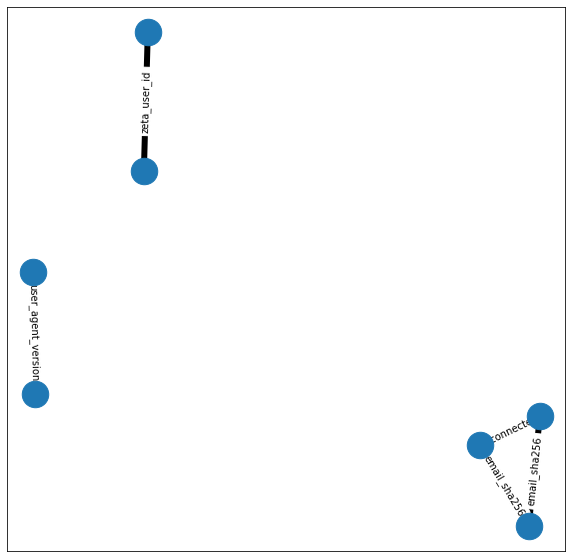

In [66]:
# plot the graph

pos = nx.spring_layout(id_graph, scale=2)
#nx.draw(id_graph, pos)
plt.figure(figsize=(10,10)) 

nx.draw_networkx_nodes(id_graph, pos, node_size=700)
nx.draw_networkx_edges(id_graph, pos, width=6)
edge_labels = nx.get_edge_attributes(id_graph,'column_id')
nx.draw_networkx_edge_labels(id_graph, pos, edge_labels = edge_labels)
plt.show()
#plt.savefig('graph_2.')